<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [585]:
import pandas as pd

In [586]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [587]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [588]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [589]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


## Loading the data and other imports

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [591]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [592]:
df.info()
#we notice some missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [593]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [594]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [595]:
#explore correlation
df['loan_status']
#observation: our label response is currently a categorical...we should eventually change this to a dummy

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

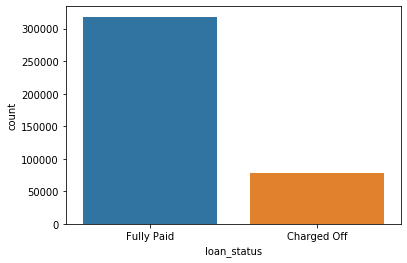

In [596]:
#examine loan_status
sns.countplot(x='loan_status',data=df)
#observations: fully paid status is more than 3x frequency of charged off status
#this is an unbalanced classification (as a result, our accuracy will likely
#be high, but our precision and recall will be challenged)

**TASK: Create a histogram of the loan_amnt column.**

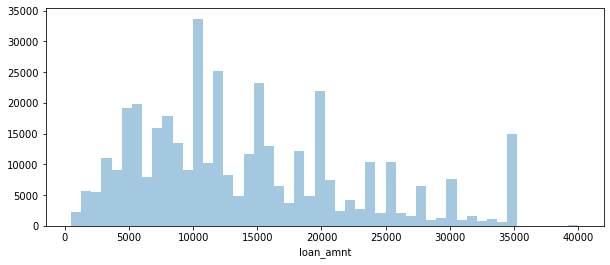

In [597]:
#loan_amnt histogram
plt.figure(figsize=(10,4))
sns.distplot(df['loan_amnt'],kde=False)
#observations: Kind of all over the place but majority in 5k-20k range
#bin spikes are occuring at "standard" loan amounts (e.g., 5k, 10k, etc.)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [598]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

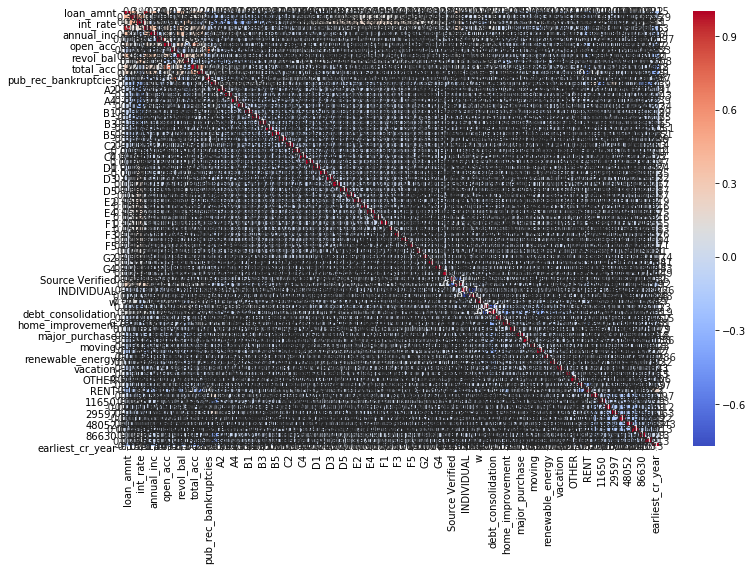

In [768]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
#observation: installment and loan amount appear highly correlated, total account and open account, public_rec_bankruptcies and pub_rec also decent correlation

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [600]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [601]:
feat_info('loan_amnt')
#observations: installment and loan amount seem repetitive

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


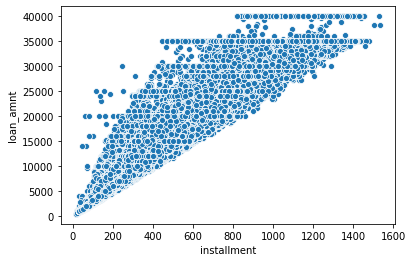

In [602]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
#observations: clearly hold a positive relationship - the higher the loan amount, typically the higher the installments are

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

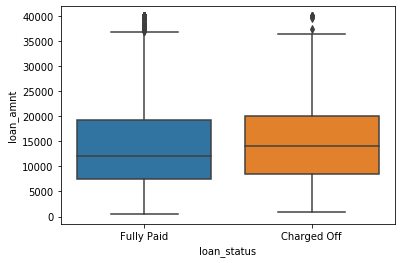

In [603]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
#observations: status of charged off appear to have higher loan amounts than statuses of fully paid

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [604]:
df.groupby(by='loan_status')['loan_amnt'].describe()
#observations: we confirm what the boxplot shows above

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [605]:
sorted(df['grade'].unique())
#observation: 7 levels for grade

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [606]:
sorted(df['sub_grade'].unique())
#observation: 35 levels for subgrade; sorted orders it alphabetically

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

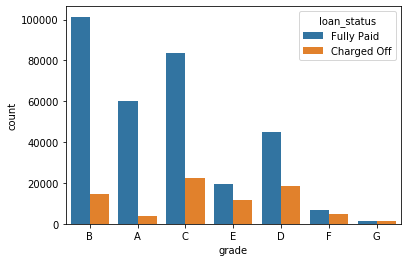

In [607]:
sns.countplot(x='grade',hue='loan_status',data=df)

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

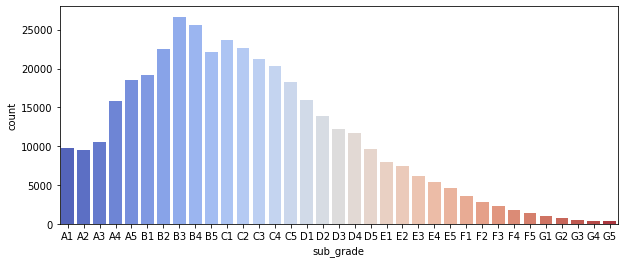

In [608]:
plt.figure(figsize=(10,4))
sub_grade_sorted = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',order=sub_grade_sorted,data=df,palette='coolwarm')

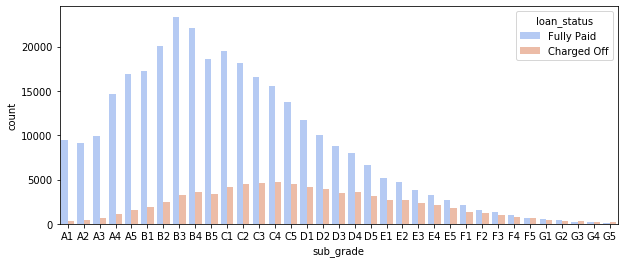

In [609]:
plt.figure(figsize=(10,4))
sub_grade_sorted = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',order=sub_grade_sorted,data=df,palette='coolwarm',hue='loan_status')
#observations: ratio between charged off:fully paid gets larger as sub_grade gets higher

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [610]:
#create a subset df that only contains grades F and G
F_G_subset = df[(df['grade']=='F') | (df['grade']=='G')]

In [611]:
F_G_subset.describe() #observation: down from 300k+ records to 14k

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,14826.000000,14826.000000,14826.000000,1.482600e+04,14826.000000,14826.000000,14826.000000,14826.000000,14801.000000,14826.000000,13577.000000,14810.000000
mean,19555.188520,24.154982,585.783808,7.611896e+04,19.429781,11.834480,0.211992,16434.589100,62.058692,25.777688,1.676364,0.135989
std,9269.508712,1.895718,272.868867,5.183047e+04,8.608556,5.727516,0.646835,18876.869104,24.636336,12.819524,2.131469,0.389452
min,1000.000000,6.000000,27.820000,4.524000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,12300.000000,23.130000,376.450000,4.800000e+04,13.182500,8.000000,0.000000,6169.000000,45.200000,17.000000,0.000000,0.000000
50%,19200.000000,24.080000,563.940000,6.579170e+04,19.165000,11.000000,0.000000,11881.500000,65.200000,24.000000,1.000000,0.000000
75%,26518.750000,25.570000,789.507500,9.000000e+04,25.320000,15.000000,0.000000,21042.750000,82.300000,33.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,2.500000e+06,107.550000,51.000000,40.000000,462076.000000,153.000000,108.000000,26.000000,8.000000


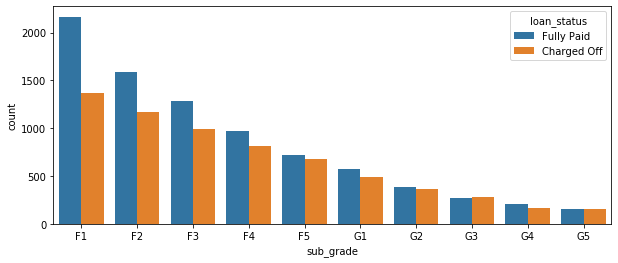

In [612]:
plt.figure(figsize=(10,4))
sub_grade_sorted2 = sorted(F_G_subset['sub_grade'].unique())
sns.countplot(x='sub_grade',order=sub_grade_sorted2,data=F_G_subset,hue='loan_status')
#observations: we see that the ratio between fully paid:charged off gets increasingly close as sub_grade lowers (especially in
#comparison to the higher grades seen earlier where the ratio is very lopsided in favour of fully paid)

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [613]:
#notice the map function...useful to reassign levels of a categorical var
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [614]:
#check - we indeed see our loan_repaid dummy at the end of the df (note the transpose to include hidden columns)
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000


In [615]:
#another way to preview our change
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

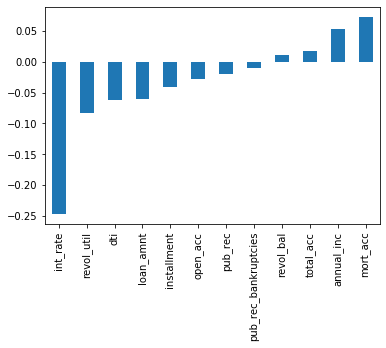

In [616]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar') #note we want to drop loan_repaid due to its 1 corr

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [617]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [618]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [619]:
df.isnull().sum()
#observations: can see a few columns that have missing values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [620]:
((df.isnull().sum())/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [621]:
print(feat_info('emp_title'))
print('\n')
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


**TASK: How many unique employment job titles are there?**

In [622]:
df['emp_title'].nunique()

173105

In [623]:
df['emp_title'].value_counts()
#observations: most common job asking for loans are teachers followed by managers...far too many titles to convert to a dummy

Teacher                               4389
Manager                               4250
Registered Nurse                      1856
RN                                    1846
Supervisor                            1830
                                      ... 
march martin                             1
Educational Aid. ( Monitor.) CACFP       1
Mclean county health dept                1
Regional orthopedics                     1
Wu Yee children service                  1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [624]:
df = df.drop('emp_title',axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [625]:
sorted(df['emp_length'].dropna().unique()) #remember the dropna here...this kind of fails due to the random punctuation

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [626]:
#create a manual ordered list
emp_length_sorted = ['< 1 year',
                    '1 year',
                    '2 years',
                    '3 years',
                    '4 years',
                    '5 years',
                    '6 years',
                    '7 years',
                    '8 years',
                    '9 years',
                    '10+ years']

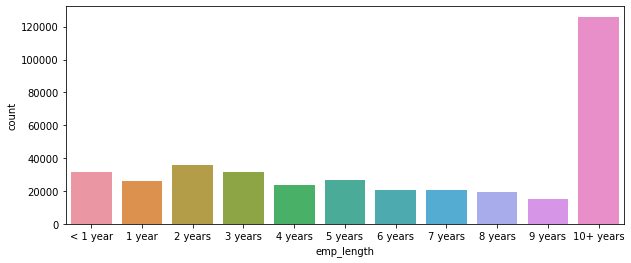

In [627]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,order=emp_length_sorted)
#observation: lots of records had the loaner being someone with employment of 10+ years

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

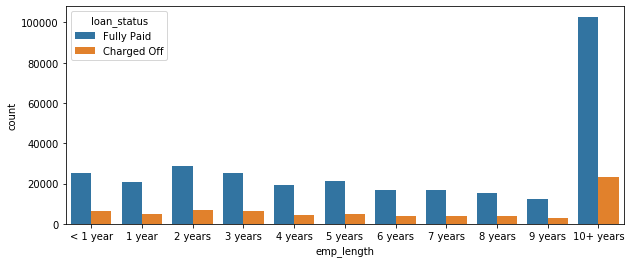

In [628]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,order=emp_length_sorted,hue='loan_status')
#observation: what we expect across the board

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [629]:
#groupby emp_length
df.groupby(by=['emp_length','loan_status'])['loan_status'].count()

emp_length  loan_status
1 year      Charged Off      5154
            Fully Paid      20728
10+ years   Charged Off     23215
            Fully Paid     102826
2 years     Charged Off      6924
            Fully Paid      28903
3 years     Charged Off      6182
            Fully Paid      25483
4 years     Charged Off      4608
            Fully Paid      19344
5 years     Charged Off      5092
            Fully Paid      21403
6 years     Charged Off      3943
            Fully Paid      16898
7 years     Charged Off      4055
            Fully Paid      16764
8 years     Charged Off      3829
            Fully Paid      15339
9 years     Charged Off      3070
            Fully Paid      12244
< 1 year    Charged Off      6563
            Fully Paid      25162
Name: loan_status, dtype: int64

In [630]:
chargedoffs_by_emplength = df[df['loan_status'] == 'Charged Off'].groupby(by='emp_length')['loan_status'].count()

In [631]:
totalrecords_by_emplength = df.groupby(by='emp_length')['loan_status'].count()

In [632]:
COpercentage_by_emplength = chargedoffs_by_emplength/totalrecords_by_emplength

In [633]:
COpercentage_by_emplength

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

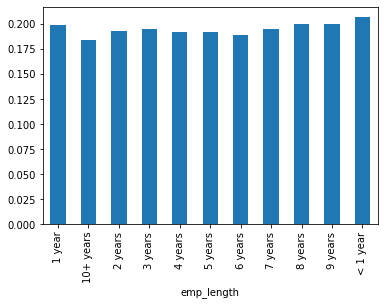

In [634]:
COpercentage_by_emplength.plot(kind='bar')
#kind of meaningless, no significant difference in terms of % of charged off

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [635]:
df = df.drop('emp_length',axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [636]:
df.isnull().sum()
#we have 4 more vars with missing data to deal with

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [637]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [638]:
df['title'].head(10) #observe that title and purpose are clearly repeating information

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [639]:
df = df.drop('title',axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [640]:
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [641]:
df['mort_acc'].value_counts()
#observations: many records of 0 (i.e., the user has 0 mortgage accounts)

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [642]:
df.corr()['mort_acc'].sort_values()
#observation: total_acc is half decently correlated with mort_acc? (nearly 0.4 correlation is moderate)

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [643]:
df.groupby(by='total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [644]:
avg_mortacc_by_totalacc = df.groupby(by='total_acc')['mort_acc'].mean()

In [645]:
#quick check
avg_mortacc_by_totalacc[2]

0.0

In [646]:
#define a function to replace any NaN with the mean from the record's corresponding total_acc value
def replace(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return avg_mortacc_by_totalacc[total_acc]
    else:
        return mort_acc

In [647]:
#apply the function above to the mort_acc column in our df
df['mort_acc'] = df.apply(lambda x: replace(x['total_acc'], x['mort_acc']), axis=1)

In [648]:
#now check if it has been fixed
df.isnull().sum() #yes it has

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [649]:
#check how many rows we currently have
df.info() #396030 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-null float64
revol_bal               396030 non-null float64
revol_util              395754 non-null float64
total_acc               396030 non

In [650]:
#this will automatically drop any records in the df that have an NA
df = df.dropna()

In [651]:
df.isnull().sum() #we are now clear of missing data!

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [652]:
df.select_dtypes([object]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [653]:
#checking out the term categorical var
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [654]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [655]:
df['term'].apply(lambda term: int(term[:3])).head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [656]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [657]:
df.info() #notice that now term is an integer type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
loan_amnt               395219 non-null float64
term                    395219 non-null int64
int_rate                395219 non-null float64
installment             395219 non-null float64
grade                   395219 non-null object
sub_grade               395219 non-null object
home_ownership          395219 non-null object
annual_inc              395219 non-null float64
verification_status     395219 non-null object
issue_d                 395219 non-null object
loan_status             395219 non-null object
purpose                 395219 non-null object
dti                     395219 non-null float64
earliest_cr_line        395219 non-null object
open_acc                395219 non-null float64
pub_rec                 395219 non-null float64
revol_bal               395219 non-null float64
revol_util              395219 non-null float64
total_acc               395219 non-

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [658]:
df = df.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [659]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [660]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [661]:
df.columns #here are our df's columsn now (notice all the dummies added...and that og subgrade has been removed)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [662]:
#view our remaining categorical variables
df.select_dtypes([object]).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [663]:
#create dummies for the 4 categorical vars outlined above...could have also combined into a single line like the solution guide
verificationstatus_dummies = pd.get_dummies(df['verification_status'],drop_first=True)
applicationtype_dummies = pd.get_dummies(df['application_type'],drop_first=True)
initialliststatus_dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)
purpose_dummies = pd.get_dummies(df['purpose'],drop_first=True)

In [664]:
#concatonate onto og df (remember to drop the og var)
df = pd.concat([df.drop('verification_status',axis=1),verificationstatus_dummies],axis=1)

In [665]:
df = pd.concat([df.drop('application_type',axis=1),applicationtype_dummies],axis=1)

In [666]:
df = pd.concat([df.drop('initial_list_status',axis=1),initialliststatus_dummies],axis=1)

In [667]:
df = pd.concat([df.drop('purpose',axis=1),purpose_dummies],axis=1)

In [668]:
df.head() #check

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [671]:
df['home_ownership'].value_counts()
#observations: other, none, and any could use some work

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [670]:
#replace none and any with other
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
df['home_ownership']

In [672]:
homeownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [674]:
df = pd.concat([df.drop('home_ownership',axis=1),homeownership_dummies],axis=1)

In [676]:
df.head() #quick check

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [679]:
df['address'].head() #preview address

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [683]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [684]:
#preview df
df['zip_code'].head() #change has been made successfully

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [688]:
#how many unique zip codes do we have?
df['zip_code'].nunique()

10

In [689]:
zipcode_dummies = pd.get_dummies(df['zip_code'],drop_first=True)

In [691]:
#add in zipcode dummies
df = pd.concat([df.drop('zip_code',axis=1),zipcode_dummies],axis=1)

In [694]:
#remove address column (since we have what we want in zipcode dummies)
df = df.drop('address',axis=1)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [698]:
#note the term "data leakage" - going back to S&A application, games_back would be an example of data leakage (at the time of
#modelling, we don't know how many games back the Jays will be at a given point of the season)
feat_info('issue_d')

The month which the loan was funded


In [700]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [702]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [703]:
#take a peak at this var
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [708]:
#grab year out of this date var (notice we convert to integer as well)
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [714]:
#drop og date var
df = df.drop('earliest_cr_line',axis=1)

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [716]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [718]:
df = df.drop('loan_status',axis=1)

In [719]:
df.head() #we are at 79 columns

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999


**TASK: Set X and y variables to the .values of the features and label.**

In [721]:
#define X and y
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [727]:
#quick check
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [728]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [729]:
#split into our train and test matrices for our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [732]:
#quick check
X_train

array([[9.700e+03, 3.600e+01, 1.727e+01, ..., 0.000e+00, 0.000e+00,
        2.006e+03],
       [2.000e+04, 3.600e+01, 1.365e+01, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       [1.335e+04, 6.000e+01, 1.727e+01, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       ...,
       [8.550e+03, 3.600e+01, 9.670e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+03],
       [1.200e+04, 6.000e+01, 1.624e+01, ..., 0.000e+00, 0.000e+00,
        1.999e+03],
       [3.500e+04, 3.600e+01, 1.999e+01, ..., 0.000e+00, 0.000e+00,
        1.997e+03]])

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [733]:
from sklearn.preprocessing import MinMaxScaler

In [734]:
scaler = MinMaxScaler()

In [735]:
#fit and transform train set
X_train = scaler.fit_transform(X_train)

In [737]:
#transform only (don't fit) test set
X_test = scaler.transform(X_test)

In [739]:
#preview
X_train (notice the transformed values in comparison to above)

array([[0.22307692, 0.        , 0.46552396, ..., 0.        , 0.        ,
        0.89855072],
       [0.48717949, 0.        , 0.32450331, ..., 0.        , 0.        ,
        0.85507246],
       [0.31666667, 1.        , 0.46552396, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.19358974, 0.        , 0.16945851, ..., 0.        , 0.        ,
        0.8115942 ],
       [0.28205128, 1.        , 0.4253993 , ..., 0.        , 0.        ,
        0.79710145],
       [0.87179487, 0.        , 0.57148422, ..., 0.        , 0.        ,
        0.76811594]])

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [740]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [743]:
#check out X_train's shape
X_train.shape #we have 78 columns, we'll set this to the # of neurons

(316175, 78)

In [744]:
model = Sequential() #create empty sequential model

model.add(Dense(78,activation='relu')) #add in individual layers (78 is number of df columns for # neurons to start with)
model.add(Dropout(0.2)) #explore adding dropout layers
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation='sigmoid')) #model end point (sigmoid because binary classification problem)

model.compile(optimizer='adam',loss='binary_crossentropy') #select optimizer (adam) and loss function (binary_crossentropy for binary classification)

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [745]:
#fit ANN model (note that we didn't set early stopping, we could have if we wanted to...see 02 Classification Workbook)
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=25,batch_size=256)

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.3022 - val_loss: 0.2643
Epoch 2/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2655 - val_loss: 0.2629
Epoch 3/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2631 - val_loss: 0.2630
Epoch 4/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2617 - val_loss: 0.2622
Epoch 5/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2610 - val_loss: 0.2616
Epoch 6/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2602 - val_loss: 0.2625
Epoch 7/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2601 - val_loss: 0.2617
Epoch 8/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2598 - val_loss: 0.2617
Epoch 9/25
316175/316175 [==============================] - 4s 12us/sample - 

**TASK: OPTIONAL: Save your model.**

In [746]:
from tensorflow.keras.models import load_model

In [748]:
model.save('keras_project_model.h5')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [751]:
#check model's loss history
model_loss = pd.DataFrame(model.history.history)

In [752]:
model_loss

,loss,val_loss
0,0.302227,0.264320
1,0.265522,0.262949
2,0.263062,0.263030
3,0.261668,0.262201
4,0.261038,0.261579
5,0.260168,0.262467
6,0.260136,0.261671
7,0.259783,0.261685
8,0.259149,0.261871
9,0.258943,0.261130


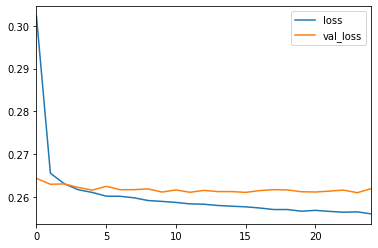

In [753]:
model_loss.plot()
#observations: our validation loss is decreasing very slightly, some disparity between training loss and validation loss near
#the later epochs (slight overfitting?)
#something we could test would be implement early stopping and rerun with more epochs

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [754]:
from sklearn.metrics import confusion_matrix, classification_report

In [755]:
#create predictions from our model (predict_classes since we have a classification problem)
predictions = model.predict_classes(X_test)

In [758]:
#preview predictions
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [759]:
#classification report
print(classification_report(y_test,predictions))
#observations: 89% accuracy...quite good...note that baseline is 80% due
#to our response imbalance! precision and recall are better metrics to look
#at here...43% recall for prediction of 0 could use some improvement, however
#this goes back to the very start of this workbook where we saw the imbalance in our response

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [760]:
#confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 6802  8856]
 [   57 63329]]


**TASK: Given the customer below, would you offer this person a loan?**

In [761]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [763]:
#test the random customer in our model
model.predict_classes(new_customer.values.reshape(1,78))
#observations: Our model predicts that this customer repays their loan

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [765]:
df.iloc[random_ind]['loan_repaid']
#observations: our model has predicted the result correctly!

1.0

# GREAT JOB!